<a href="https://colab.research.google.com/github/ganesh-207/Artificial-Intelligence/blob/main/MultiClass_Classification_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd
df = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/mobile_train%20(1).csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
df['price_range'].unique()

array([1, 2, 3, 0])

## Perform basic data quality cheks

In [7]:
df.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(2000, 21)

## Separate The data X and Y

In [11]:
X = df.drop(columns='price_range')
Y = df[['price_range']]

In [12]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [13]:
Y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


## Data Cleaning and Data Preprocessing

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
num_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
).set_output(transform='pandas')

In [16]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


## Split the data into training and testing

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.80,random_state=42)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape,sep='\t')

(1600, 20)	(400, 20)	(1600, 1)	(400, 1)


## Convert y data into categorical data-preprocessing the Y data

In [21]:
ytrain['price_range'].unique()

array([1, 2, 0, 3])

In [22]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [23]:
ytrain_cat[:1]

array([[0., 1., 0., 0.]])

## Model building

In [20]:
from keras.models import Sequential
from keras.layers import Input,Dense

In [26]:
model = Sequential()

## Add the input layer
model.add(Input(shape=(xtrain.shape[1],)))

## Add the Dense layer-Hidden layers1
model.add(Dense(units=32,activation='relu'))

## Add the Dense layer-Hidden layers2
model.add(Dense(units=16,activation='relu'))

## Add the output layer
model.add(Dense(units=ytrain_cat.shape[1],activation='softmax'))

In [27]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,268 (4.95 KB)

 Trainable params: 1,268 (4.95 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
nn = model.fit(xtrain,ytrain_cat,epochs=25,validation_split=0.25)

Epoch 1/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.2597 - loss: 1.4148 - val_accuracy: 0.3150 - val_loss: 1.3362
Epoch 2/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3758 - loss: 1.3080 - val_accuracy: 0.3875 - val_loss: 1.2523
Epoch 3/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4796 - loss: 1.2055 - val_accuracy: 0.4500 - val_loss: 1.1519
Epoch 4/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5450 - loss: 1.0799 - val_accuracy: 0.4950 - val_loss: 1.0365
Epoch 5/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6132 - loss: 0.9491 - val_accuracy: 0.5700 - val_loss: 0.9255
Epoch 6/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6431 - loss: 0.8587 - val_accuracy: 0.6275 - val_loss: 0.8244
Epoch 7/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7407 - loss: 0.7221 - val_accuracy: 0.7075 - val_loss: 0.7353
Epoch 8/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7723 - loss: 0.6398 - val_accuracy: 0.7375 - val_loss

## Learning Curve

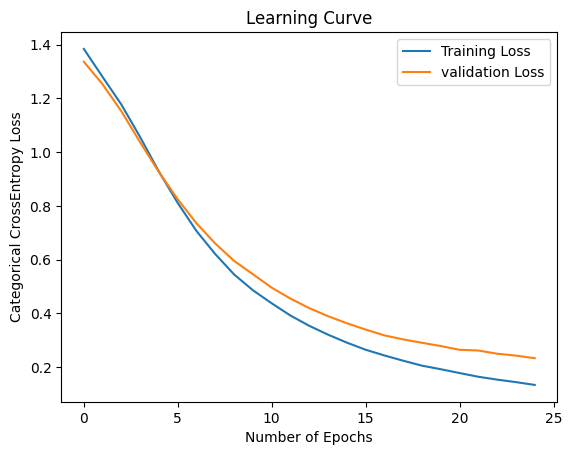

In [31]:
import matplotlib.pyplot as plt
plt.plot(nn.history['loss'],label='Training Loss')
plt.plot(nn.history['val_loss'],label='validation Loss')
plt.legend()
plt.title('Learning Curve')
plt.xlabel('Number of Epochs')
plt.ylabel('Categorical CrossEntropy Loss')
plt.show()

## Evaluate the model

In [32]:
model.evaluate(xtest,ytest_cat)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9085 - loss: 0.2267 


[0.2490423172712326, 0.8899999856948853]

In [33]:
model.evaluate(xtest,ytest_cat)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9085 - loss: 0.2267 


[0.2490423172712326, 0.8899999856948853]

## Save the model for final out of sample predication

In [34]:
model.save('MobilePrice.keras')

## Load The Model

In [36]:
from keras.models import load_model
m1 = load_model('/content/MobilePrice.keras')
m1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,806 (14.87 KB)

 Trainable params: 1,268 (4.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,538 (9.92 KB)

In [37]:
ytrain['price_range'].unique()

array([1, 2, 0, 3])

In [38]:
ypreds_test = m1.predict(xtest)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [39]:
import numpy as np
final_ypreds_test = np.argmax(ypreds_test,axis=1)
final_ypreds_test[:10]

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1])

In [40]:
from sklearn.metrics import accuracy_score
ac_sc = accuracy_score(ytest,final_ypreds_test)
ac_sc

0.89

## Check the confusion matrix and classification reports as well

In [41]:
ytest_cat[0]

array([1., 0., 0., 0.])

In [42]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [43]:
print(classification_report(ytest,final_ypreds_test))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       105
           1       0.85      0.87      0.86        91
           2       0.82      0.87      0.85        92
           3       0.94      0.89      0.92       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



## Out of sample predication

In [44]:
xnew = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/mobile_test%20(1).csv')
xnew.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [45]:
xnew2 = xnew.drop(columns='id')
xnew_pre = num_pipe.transform(xnew2)
final_preds = m1.predict(xnew_pre)
final_preds[:5]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[2.0832689e-09, 1.5515722e-04, 7.7462071e-01, 2.2522406e-01],
       [5.0003628e-14, 2.4317208e-07, 4.3802194e-02, 9.5619750e-01],
       [1.2199248e-08, 2.7224270e-04, 5.6703120e-01, 4.3269655e-01],
       [1.1180730e-12, 2.9124016e-07, 1.0332903e-02, 9.8966682e-01],
       [4.9041968e-02, 9.3772256e-01, 1.3234782e-02, 6.4656672e-07]],
      dtype=float32)

In [46]:
final_preds2 = np.argmax(final_preds,axis=1)
final_preds2[:10]

array([2, 3, 2, 3, 1, 3, 3, 1, 3, 0])

In [47]:
xnew['Mobile Price Range Predictions'] = final_preds2
xnew.to_csv('Prediction.csv',index=False)